<a href="https://colab.research.google.com/github/AkankshaKapil/AkankshaKapil/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the library

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA ANALYSIS

In [2]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.shape#this means data have 7043 rows and 21 columns


(7043, 21)

In [4]:
data #displaying the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.isna().sum()#checking for the missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#value_counts() function returns object containing counts of unique values. 
#The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
#Excludes NA values by default
data.Churn.value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#so this displays all the columns that have output like yes or no /0 and 1 or anything but only 2
columns=data.columns
binary_cols=[]
for col in columns:
  if data[col].value_counts().shape[0] == 2:
    binary_cols.append(col)
binary_cols    

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

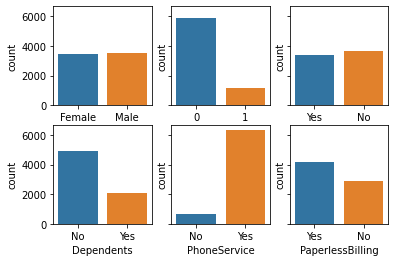

In [9]:

fig, axes = plt.subplots(2,3,sharey=True)
sns.countplot("gender",data=data,ax=axes[0,0])
sns.countplot("SeniorCitizen",data=data,ax=axes[0,1])
sns.countplot("Partner",data=data,ax=axes[0,2])
sns.countplot("Dependents",data=data,ax=axes[1,0])
sns.countplot("PhoneService",data=data,ax=axes[1,1])
sns.countplot("PaperlessBilling",data=data,ax=axes[1,2])

In [10]:
churn_numeric = {'Yes':1 , 'No':0}
data.Churn.replace(churn_numeric,inplace=True)

In [11]:
data[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [12]:
data[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [13]:
data[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [14]:
data[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [15]:
data[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [16]:
data[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


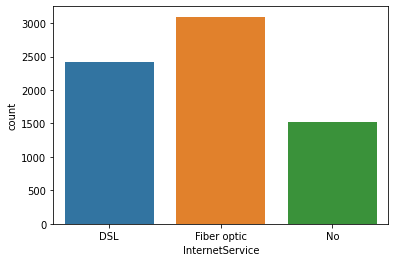

In [17]:
sns.countplot('InternetService',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


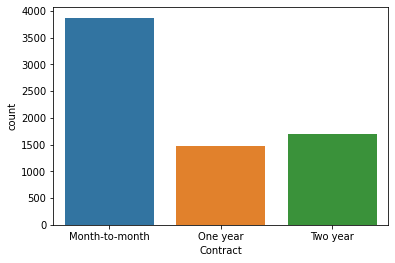

In [18]:
sns.countplot('Contract',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


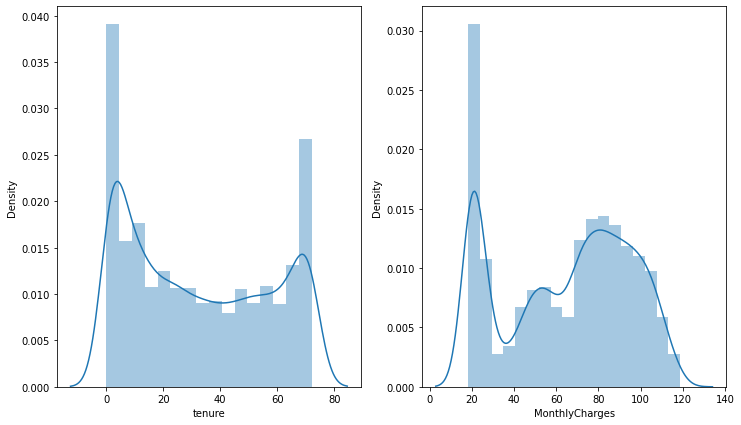

In [19]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(data["tenure"], ax=axes[0])
sns.distplot(data["MonthlyCharges"], ax=axes[1])

In [20]:
# Dropping these as they dont have much significance over churn
data.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [21]:
data


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,0
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,0
7040,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check,29.60,0
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,74.40,1


DATA PREPROCESSING

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [23]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

Y = pd.get_dummies(data,columns=cat_features ,drop_first=True)

In [24]:
Y

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
7039,72,103.20,0,0,1,1,0,1,1,0,...,0,0,0,1,0,1,1,1,0,0
7040,11,29.60,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [25]:
sc = MinMaxScaler()
a = sc.fit_transform(data[['tenure']])
b = sc.fit_transform(data[['MonthlyCharges']])
Y['tenure'] = a
Y['MonthlyCharges'] = b
Y

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
7039,1.000000,0.845274,0,0,1,1,0,1,1,0,...,0,0,0,1,0,1,1,1,0,0
7040,0.152778,0.112935,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,0.055556,0.558706,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Before Resampling')

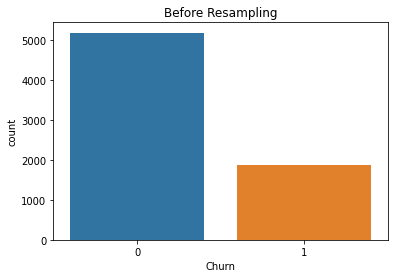

In [26]:
sns.countplot('Churn', data=data).set_title('Before Resampling')

In [27]:
Y_no = Y[Y.Churn == 0]
Y_yes = Y[Y.Churn == 1]
Y_yes_upsampled = Y_yes.sample(n=len(Y_no), replace=True, random_state=42)
print(len(Y_yes),len(Y_yes_upsampled))

1869 5174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'After Resampling')

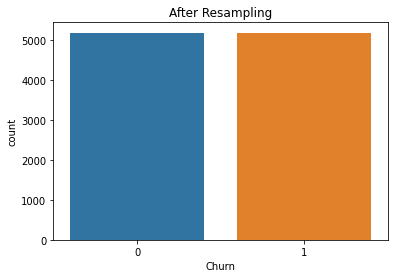

In [28]:
Y_upsampled = Y_no.append(Y_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=Y_upsampled).set_title('After Resampling')

In [29]:
Y_upsampled.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X = Y_upsampled.drop(['Churn'], axis=1)
y = Y_upsampled['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [32]:
from sklearn.linear_model import RidgeClassifier#The Ridge Classifier, based on Ridge regression method, converts the label data into [-1, 1] and solves the problem with regression method.
from sklearn.metrics import accuracy_score

In [33]:
clf_ridge = RidgeClassifier()
clf_ridge.fit(X_train, y_train)

RidgeClassifier()

In [34]:
pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.7574293307562213

In [35]:
pred = clf_ridge.predict(X_test)
accuracy_score(y_test,pred)

0.7608695652173914

Accuracy on training set is 75.74%
Accuracy in test set is 76.08%

In [36]:
# Trying different model
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [37]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8858419908190384

In [38]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8391304347826087

In [39]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X, y)

SVC()

In [40]:
pred = clf_svm.predict(X_train)
accuracy_score(y_train, pred)

0.7936699685914472

In [41]:
pred_test = clf_svm.predict(X_test)
accuracy_score(y_test, pred_test)

0.7903381642512077

In [42]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X, y)

DecisionTreeClassifier()

In [43]:
pred = clf_tree.predict(X_train)
accuracy_score(y_train, pred)

0.9967383425948296

In [44]:
pred_test = clf_tree.predict(X_test)
accuracy_score(y_test, pred_test)

0.9975845410628019

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [46]:
clf.fit(X, y)



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [47]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 20, 'n_estimators': 150}
0.8998846090085294


As we can see Decision Tree Classifer gives the best accuracy .
We used grid search cv to increase accuracy of Random Forest and it incresed to 90%

MODELS USED:
1.Ridge Classifier
2.Random Forest
3.SVM
4.Decision Tree
5.Improved Random Forest using grid search cv
